<p style="color:#5A5A5A">IF GRAPHVIZ CAUSES AN ERROR, PLEASE INSTALL AT <a style="color:orange" href="https://graphviz.org/download/"> THIS LINK </a> <br>
THEN PLEASE RESTART JUPYTER NOTEBOOK, IT SHOULD WORK FINE AFTER c: 
<br>
(or just comment it out)
    <br>
May also need to install the seaborn library
    
RUN FROM TOP TO BOTTOM. Also, check the comments for cell descriptions.
</p>

In [1]:
#specicying random seed
import random
random.seed(1)

In [2]:
#read data from csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ans = []
orig_data = pd.read_csv("water_potability.csv") 
orig_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


<h1 style="color:purple"> Preprocessing </h1>

In [3]:
#Check for null values and drop rows with any nulls
clean_df=orig_data.dropna()
clean_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [4]:
# Check column types
clean_df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

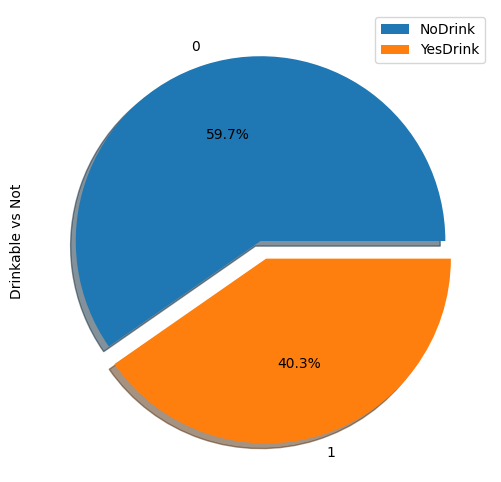

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [5]:
#defining a pie chart to show the data distributions
def distrib(data):
    count = ""
    
    if isinstance(data, pd.DataFrame):
        count = data["Potability"].value_counts()
    else:
        count = data.value_counts()
        
    count.plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
    plt.ylabel("Drinkable vs Not")
    plt.legend(["NoDrink", "YesDrink"])
    plt.show()
distrib(clean_df)
clean_df=orig_data.dropna()
df = clean_df
clean_df

In [6]:
#other preprocessing (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,df.columns[0:9]] = scaler.fit_transform(df[df.columns[0:9]])
df

#unused minmax scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df.loc[:,df.columns[0:9]] = scaler.fit_transform(clean_df[clean_df.columns[0:9]])

#will cause a warning about slicing. it is working as intended.

C:\Users\CEO\AppData\Local\Temp\ipykernel_4988\3193216493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,df.columns[0:9]] = scaler.fit_transform(df[df.columns[0:9]])


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761,0
4,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033,0
5,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366,0
6,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163,0
7,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348,0
...,...,...,...,...,...,...,...,...,...,...
3267,1.210411,0.584770,-0.693978,-0.528284,-0.492625,-0.447578,-1.341281,-0.705001,0.825626,1
3268,-0.243774,0.347964,-0.540564,0.362137,-0.697038,-1.205321,0.559422,-2.334474,-0.675183,1
3269,2.800492,-3.100365,1.767503,1.343596,-1.803476,0.165656,0.546021,-1.545585,0.512125,1
3270,-0.646160,-0.285317,0.488576,0.387023,0.302843,-0.131852,-0.688929,-0.372108,-0.384562,1


In [7]:
# #for non-undersampling runs, just uncomment this then comment the next cell

# ##preparing the dataset into train and test
# from sklearn.model_selection import train_test_split
# #splitting the features and labels
# X = df.drop('Potability', axis = 1)
# y = df['Potability']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=1)

# y_test.reset_index(drop=True)
# X_train

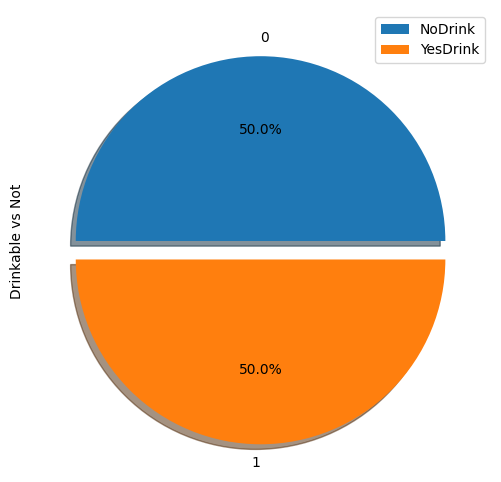

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1147,-0.289818,-0.105629,1.661124,-1.363568,-1.352724,-1.314317,0.128947,0.907065,-0.790826
917,1.148806,0.861561,0.120686,1.166163,-1.420933,0.492228,-1.403272,-0.424538,-0.449394
1380,-1.401358,-1.807634,-0.325509,0.082263,2.099573,-0.848655,-0.288291,0.593114,-1.178656
792,-0.124426,-0.313358,-1.122598,0.560833,0.423188,-0.397631,0.814404,1.258684,0.167875
1306,-1.181919,-2.110233,-1.621524,-0.235044,0.054307,0.604839,-0.491166,0.809996,1.497563
...,...,...,...,...,...,...,...,...,...
724,-0.196517,-0.200118,-0.260836,0.790233,1.025191,-0.076451,0.142549,-0.332881,-0.830176
457,0.127263,0.382383,1.037210,-0.175061,0.068556,-0.916123,-1.140526,-0.147795,0.918143
145,1.635576,1.360247,-0.190705,-0.052770,0.994224,1.750570,0.369870,-0.657302,0.858368
110,0.199784,0.700547,-1.595049,-0.535197,-0.545298,1.142688,0.249278,-0.968316,1.166940


In [8]:
#for undersampling, including the splitting
from sklearn.model_selection import train_test_split
X = df.drop('Potability', axis = 1)
y = df['Potability']

X_train_cp = X.copy()
X_train_cp['Potability'] = y
y_0 = X_train_cp[X_train_cp['Potability'] == 0]
y_1 = X_train_cp[X_train_cp['Potability'] == 1]

y_0_undersample = y_0.sample(y_1.shape[0], random_state=1)

y_0_undersample.reset_index(drop=True, inplace=True)
y_1.reset_index(drop=True, inplace=True)

df = pd.concat([y_0_undersample, y_1], ignore_index=True, verify_integrity=True, axis=0)
df = df.reset_index(drop=True)
distrib(df)

X = df.drop('Potability', axis = 1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=1)
X_train

#to turn randomizer ON, remove all reset_indexes, remove ignore_index in concat, and remove random_state
#also remove the random.seed at the top

<h1 style="color:blue"> Running ML </h1>

In [9]:
#Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression( max_iter=15000)

logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)

print(classification_report(y_test,y_pred))
ans.append(classification_report(y_test,y_pred))

y_pred
#may cause a warning if f1 scores are 0.00, plaese ignore!

              precision    recall  f1-score   support

           0       0.46      0.43      0.44       162
           1       0.47      0.50      0.48       163

    accuracy                           0.46       325
   macro avg       0.46      0.46      0.46       325
weighted avg       0.46      0.46      0.46       325



array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [10]:
#SVC
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear', max_iter = 15000)
svc_classifier.fit(X_train, y_train)

# Make Prediction
y_pred = svc_classifier.predict(X_test)


print(classification_report(y_test,y_pred))
ans.append(classification_report(y_test,y_pred))
y_pred
#may cause a warning if f1 scores are 0.00, plaese ignore!
#may also cause a warning stated that it terminated early. also please ignore, since we set the max iterations already

              precision    recall  f1-score   support

           0       0.46      0.59      0.52       162
           1       0.44      0.33      0.37       163

    accuracy                           0.46       325
   macro avg       0.45      0.46      0.45       325
weighted avg       0.45      0.46      0.45       325



C:\Users\CEO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       162
           1       0.67      0.50      0.58       163

    accuracy                           0.63       325
   macro avg       0.64      0.63      0.62       325
weighted avg       0.64      0.63      0.62       325



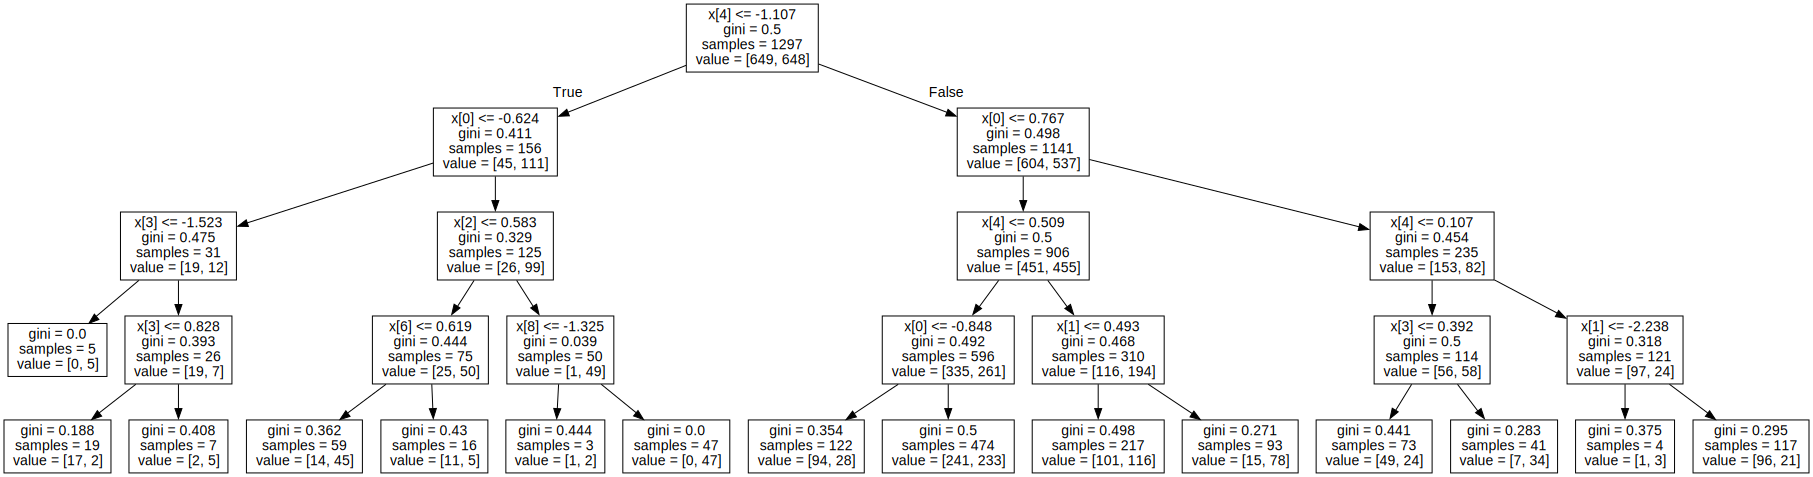

DecisionTreeClassifier(max_depth=4, min_samples_split=7, random_state=1)

In [11]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=1)

#grid to search; change CV as needed
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20 ]}
grid_search = GridSearchCV(clf, param_grid, cv=15)
grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
ans.append(classification_report(y_test,y_pred))

#importing graphviz to show the graph, uncomment the render to get the file
from sklearn.tree import export_graphviz
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
display(graph)
#graph.render("tree1", format='png')
grid_search.best_estimator_

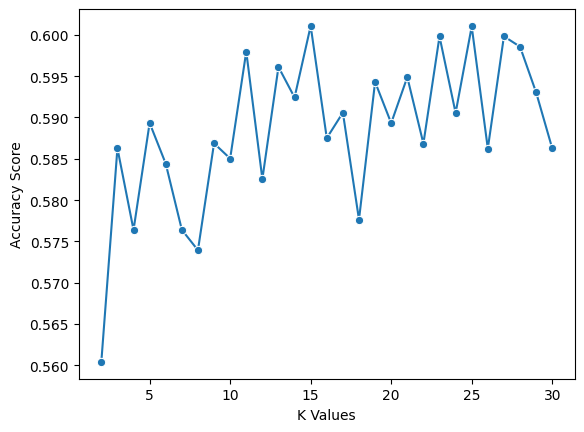

In [12]:
#kNN with best k
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
k_values = [i for i in range (2,31)]
scores = []

#knn = KNeighborsClassifier()
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=15)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

In [13]:
#actual kNN results
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
ans.append(classification_report(y_test,y_pred))
best_k

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       162
           1       0.64      0.58      0.61       163

    accuracy                           0.62       325
   macro avg       0.63      0.62      0.62       325
weighted avg       0.63      0.62      0.62       325



15

<h1 style="color:green"> Printing the Results </h1>

In [14]:
#printing all the results out, from top to bottom
#from top to bottom: LR, SVC, DT, kNN
for i in range(len(ans)):
    print(ans[i])

              precision    recall  f1-score   support

           0       0.46      0.43      0.44       162
           1       0.47      0.50      0.48       163

    accuracy                           0.46       325
   macro avg       0.46      0.46      0.46       325
weighted avg       0.46      0.46      0.46       325

              precision    recall  f1-score   support

           0       0.46      0.59      0.52       162
           1       0.44      0.33      0.37       163

    accuracy                           0.46       325
   macro avg       0.45      0.46      0.45       325
weighted avg       0.45      0.46      0.45       325

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       162
           1       0.67      0.50      0.58       163

    accuracy                           0.63       325
   macro avg       0.64      0.63      0.62       325
weighted avg       0.64      0.63      0.62       325

              preci